# Imports

In [61]:
import numpy as np
import json
import os
import math
import matplotlib.pyplot as plt
import time
import copy
from copy import deepcopy
import operator
import pickle
from tqdm import tqdm
from math import isnan
import pandas as pd

from data_viz import *
from KMeans import *
from clustering_and_reconstruction import *
from Second_method import *
from First_method import *
from utils import *

# Path definition

In [97]:
dir_joints = 'Joints_semidef'
dir_im = 'Immagini_semidef'

save_path = os.path.join(os.getcwd(), 'best_worst_cases')
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Compare poses

### Loading poses

In [3]:
start = time.time()

dict_joints = {}
dict_joints_SR_destrorso = {}
for posa in tqdm(os.listdir(dir_im)):
  posa1 = posa[:-13]
  posa = posa1 + "_keypoints.json"
  try:
    file = dir_joints+'/'+posa
    if os.path.isfile(file):
      with open(file) as f:
        data = json.load(f)
      prova = data['people'][0]['pose_keypoints_2d']
      punti = []
      punti1 = []
      i = 0
      max_y = 0.0
      while i < 75:
        x = prova[i]
        y1 = prova[i+1]
        y2 = -prova[i+1]
        punto = [x,y1]
        punto1 = [x,y2]
        punti.append(punto)
        punti1.append(punto1)
        i += 3
        if np.abs(y1)> max_y:
            max_y = np.abs(y1)
      punti = punti[:15]
      punti1 = punti1[:15]
      for i in range(len(punti1)):
        punti1[i][1] += max_y

      dict_joints[posa1] = punti
      dict_joints_SR_destrorso[posa1] = punti1
  except:
    print(posa)
end = time.time()
print(end-start)
print(len(dict_joints))

100%|██████████| 618/618 [00:00<00:00, 1676.28it/s]


0.3846306800842285
618


### Visualization pose+statue

1498scala_rendered.png


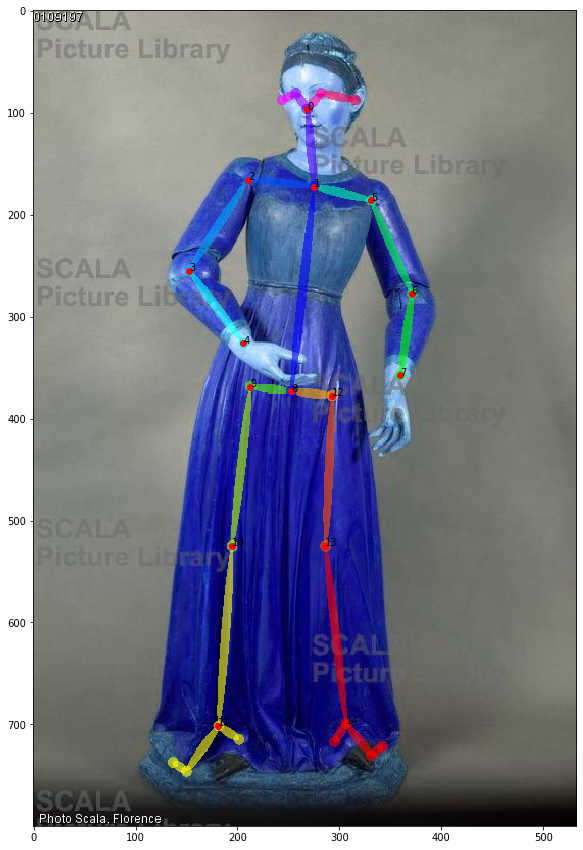

In [122]:
i = 75 #insert a number of a sample

show_pose(i, dict_joints, dir_im)

### Generation of comparison results

#### First method

In [ ]:
best_worst_cases_1 = {}

start = time.time()

for i in tqdm(range(len(dict_joints_SR_destrorso))):
  sample = dict_joints_SR_destrorso[list(dict_joints_SR_destrorso.keys())[i]]
  dict_losses = {}
  for key in list(dict_joints_SR_destrorso.keys()):  
    MC = MatchingClass1(sample, dict_joints_SR_destrorso[key])
    MC.weight = 1
    loss = MC.minimum()[1]
    dict_losses[key] = loss
  
  sorted_d = sorted(dict_losses.items(), key=operator.itemgetter(1))
  best_5 = sorted_d[:5]
  worst = sorted_d[-1]

  best_worst_cases_1[i] = [best_5, worst]
 
end = time.time()
print(end-start)

#### Second method

In [10]:
best_worst_cases_2 = {}

start = time.time()

for i in tqdm(range(len(dict_joints_SR_destrorso))):
  sample = dict_joints_SR_destrorso[list(dict_joints_SR_destrorso.keys())[i]]
  dict_losses = {}
  for key in list(dict_joints_SR_destrorso.keys()):  
    MC = MatchingClass2(sample, dict_joints_SR_destrorso[key])
    MC.weight = 1
    loss = MC.loss()
    dict_losses[key] = loss
  
  sorted_d = sorted(dict_losses.items(), key=operator.itemgetter(1))
  best_5 = sorted_d[:5]
  worst = sorted_d[-1]

  best_worst_cases[i] = [best_5, worst]
 
end = time.time()
print(end-start)

100%|██████████| 618/618 [49:56<00:00,  4.85s/it]


2996.177488088608


### Writing results on txt

In [20]:
with open(os.path.join(save_path, 'best_worst_cases_1.txt'), 'wb') as fp:
   pickle.dump(best_worst_cases_1, fp)

with open(os.path.join(save_path, 'best_worst_cases_2.txt'), 'wb') as fp:
    pickle.dump(best_worst_cases_2, fp)

### Uploading results from txt

#### First method

In [ ]:
best_worst_cases_1 = {}
with open (os.path.join(save_path, 'best_worst_cases_1.txt'), 'rb') as fp:
  best_worst_cases_1 = pickle.load(fp)

#### Second method

In [26]:
best_worst_cases_2 = {}
with open (os.path.join(save_path, 'best_worst_cases_2.txt'), 'rb') as fp:
  best_worst_cases_2 = pickle.load(fp)

### Showing results

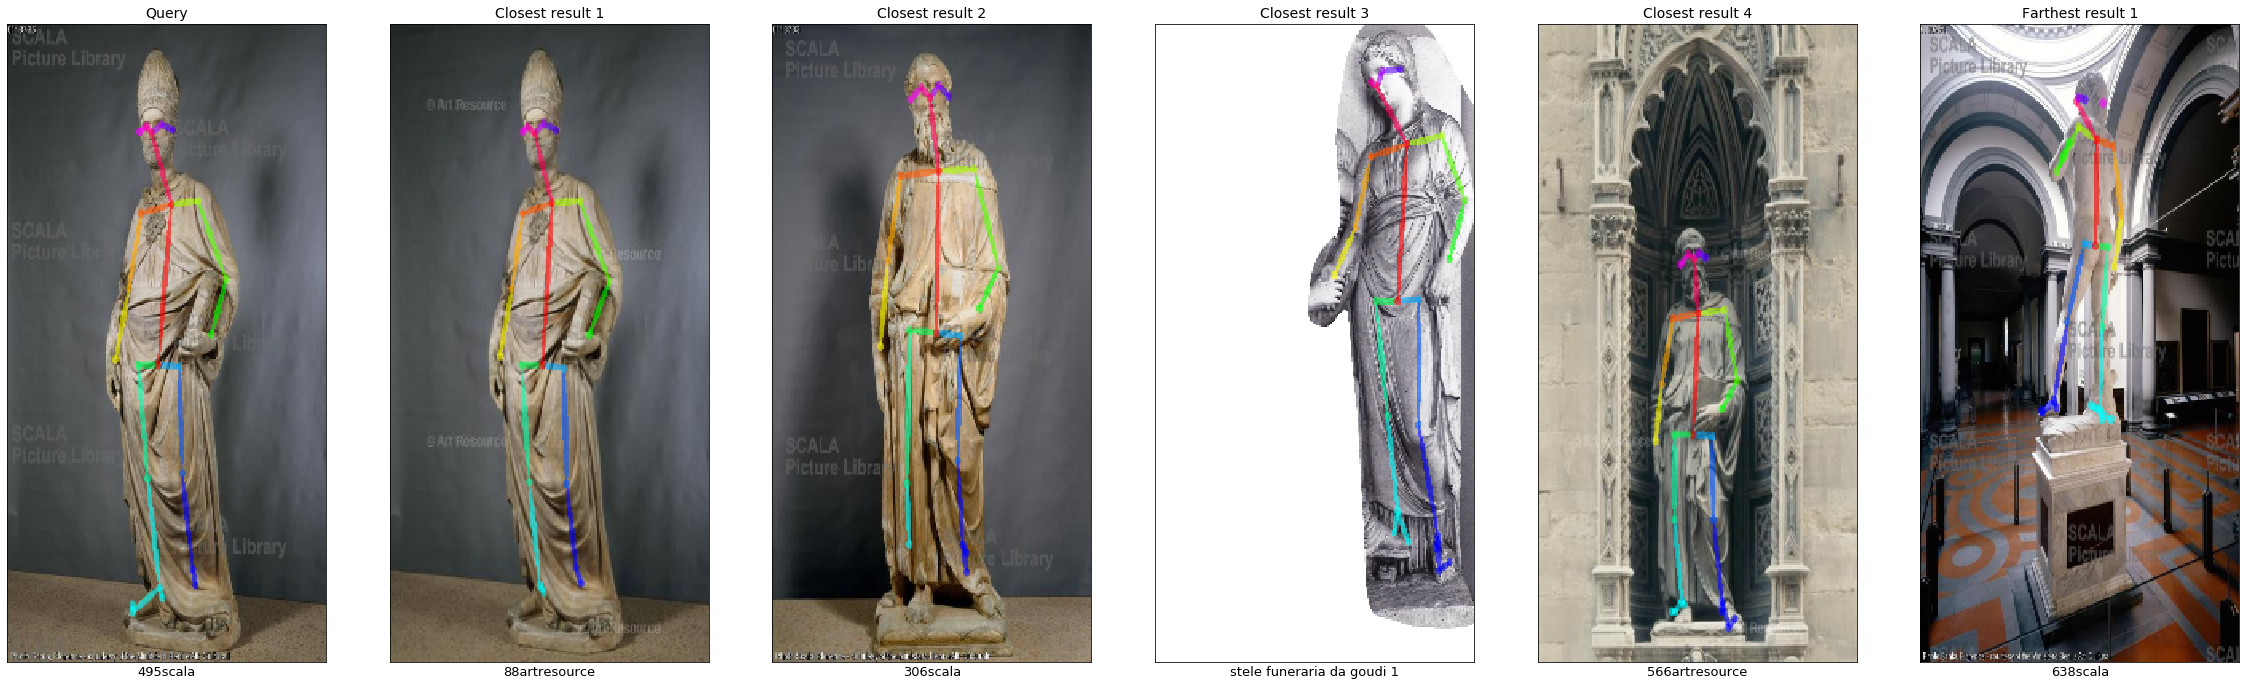

Query:  495scala 

---------------

Closest results: 

88artresource 

306scala 

stele funeraria da goudi 1 

566artresource 

---------------

Farthest result:  638scala


In [36]:
plot_images(dir_im, 318, best_worst_cases_2) #insert a number of a sample and the dict of the results of the selected method

### Saving images of results

In [52]:
for j in tqdm(range(len(best_worst_cases_2))):
  try:
    save_images(dir_im, j, 1, best_worst_cases_2)
  except:
    pass

100%|██████████| 618/618 [10:24<00:00,  1.01s/it]


<Figure size 2880x2880 with 0 Axes>

# Clustering

### Clustering

In [55]:
n_clusters = 9 #insert the number of desired clusters

In [ ]:
df_clustering, relevant_features_centroids, centroids = k_means(create_features(dict_joints_SR_destrorso)[0], 
                                                                create_features(dict_joints_SR_destrorso)[1], n_clusters)

### Pose reconstruction

In [120]:
clustering_several_n([5,10,15], dict_joints_SR_destrorso)

Clustering with 4 clusters: done
